 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [167]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [168]:
# Reading whale returns
whales_df=pd.read_csv('Resources/whale_returns.csv', 
               index_col="Date", 
               infer_datetime_format = True, 
               parse_dates = True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [169]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [170]:
# Drop nulls
whales_df = whales_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [171]:
# Reading algorithmic returns
algo_df=pd.read_csv('Resources/algo_returns.csv',index_col="Date", 
               infer_datetime_format = True, 
               parse_dates = True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [172]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [173]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [174]:
# Reading S&P 500 Closing Prices
sp500_df=pd.read_csv('Resources/sp500_history.csv',index_col="Date", 
               infer_datetime_format = True, 
               parse_dates = True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [175]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [176]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")  
sp500_df['Close'] = sp500_df['Close'].astype("float")

/var/folders/p6/4hj68bmj34l3g_77hqy_dq8h0000gn/T/ipykernel_6200/2778867247.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace("$","")


In [177]:
sp500_df.dtypes

Close    float64
dtype: object

In [178]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [179]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [180]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {'Close':'sp500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [181]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine_df = pd.concat([whales_df, algo_df, sp500_returns], axis = 'columns',join='inner')
combine_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

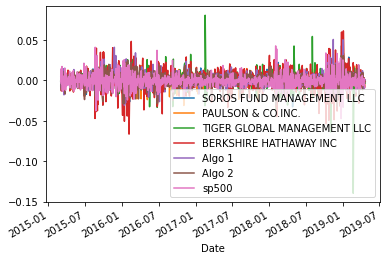

In [182]:
# Plot daily returns of all portfolios

combine_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

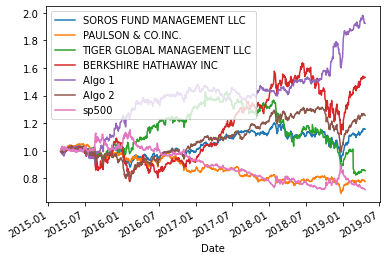

In [183]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + combine_df).cumprod()

# Plot cumulative returns
cumulative_returns_df.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

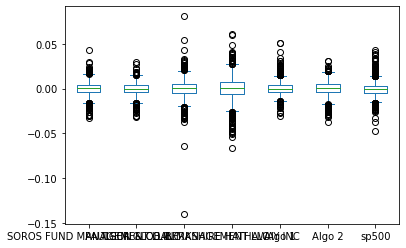

In [184]:
# Box plot to visually show risk
combine_df.plot(kind="box")

### Calculate Standard Deviations

In [185]:
# Calculate the daily standard deviations of all portfolios
combine_std = combine_df.std()

### Determine which portfolios are riskier than the S&P 500

In [186]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combine_df["sp500"].std()

# Determine which portfolios are riskier than the S&P 500
combine_std > sp500_std


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [187]:
# Calculate the annualized standard deviation (252 trading days)
combine_std*(252**0.5)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

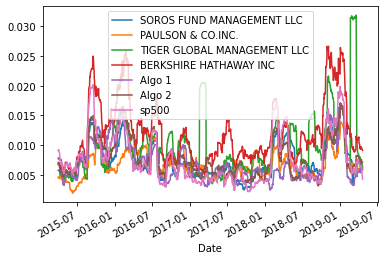

In [188]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine_rolling_std = combine_df.rolling(window=21).std()

# Plot the rolling standard deviation
combine_rolling_std.plot()


### Calculate and plot the correlation

In [189]:
# Calculate the correlation
combine_correlation = combine_df.corr()

# Display de correlation matrix
combine_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

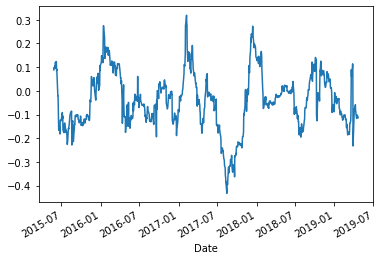

In [190]:
# Calculate covariance of a single portfolio
covariance = combine_df['Algo 1'].rolling(window=60).cov(combine_df['sp500'])

# Calculate variance of S&P 500
variance = combine_df['sp500'].rolling(window=60).var()


# Computing beta
beta = covariance/variance

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [191]:
# Use `ewm` to calculate the rolling window
combine_df.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [192]:
# Annualized Sharpe Ratios
combine_sharpe_ratios = combine_df.mean()/combine_std*(252**.5)


<AxesSubplot:>

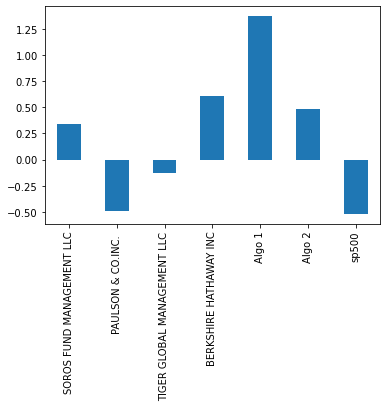

In [193]:
# Visualize the sharpe ratios as a bar plot
combine_sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [194]:
# Reading data from 1st stock
aapl_df=pd.read_csv('Resources/aapl_historical.csv', 
               index_col="Trade DATE", 
               infer_datetime_format = True, 
               parse_dates = True)

In [195]:
# Reading data from 2nd stock
cost_df=pd.read_csv('Resources/cost_historical.csv', 
               index_col="Trade DATE", 
               infer_datetime_format = True, 
               parse_dates = True)

In [196]:
# Reading data from 3rd stock
goog_df=pd.read_csv('Resources/goog_historical.csv', 
               index_col="Trade DATE", 
               infer_datetime_format = True, 
               parse_dates = True)

In [197]:
# Combine all stocks in a single DataFrame
combine_df2 = pd.concat([aapl_df, cost_df, goog_df], axis = 1, join = "inner")

In [198]:
# Reset Date index
combine_df2.index = combine_df2.index

In [199]:
# Reorganize portfolio data by having a column per symbol
combine_df2 = combine_df2.iloc[:,1::2]
combine_df2.columns = ['AAPL','COST','GOOG']
combine_df2

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [200]:
# Calculate daily returns
combine_df2 = combine_df2.pct_change()

# Drop NAs
combine_df2 = combine_df2.dropna()

# Display sample data
combine_df2.head()


,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [201]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combine_df2.dot(weights)


# Display sample data
weighted_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [202]:
# Join your returns DataFrame to the original returns DataFrame
combine_df= pd.concat([combine_df,combine_df2],axis=1, join="inner")


In [209]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_df = combine_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.002339,-0.000613,-0.001763
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.009172,0.002046,0.019431
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009246,-0.016255,-0.002348
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.006364,-0.004459,0.002948
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003650,0.003217,0.011469
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000100,0.004035,-0.004914
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.019101,-0.000896,-0.007449
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003581,-0.001017,-0.000024
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.003276,0.009818,-0.009985


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [204]:
# Calculate the annualized `std`
combine_df.std()*(252**.5)

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
sp500                          0.152147
AAPL                           0.300875
COST                           0.216182
GOOG                           0.255365
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

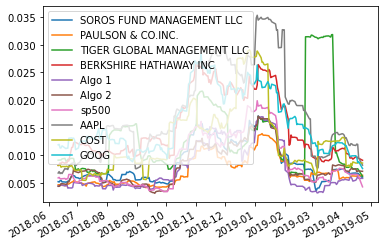

In [205]:
# Calculate rolling standard deviation
rolling_std = combine_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot() 

### Calculate and plot the correlation

<AxesSubplot:>

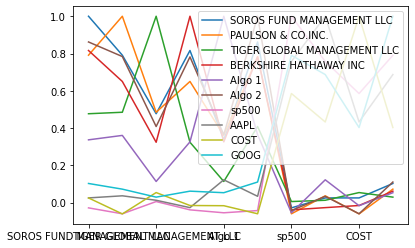

In [206]:
# Calculate and plot the correlation
combine_df.corr().plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

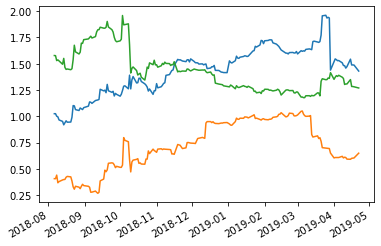

In [215]:
# Calculate and plot Beta
aaple_covariance = combine_df['AAPL'].rolling(window=60).cov(combine_df['sp500'])
COST_cov=combine_df["COST"].rolling(window=60).cov(combine_df["sp500"])
GOOG_cov=combine_df["GOOG"].rolling(window=60).cov(combine_df["sp500"])
variance=combine_df["sp500"].rolling(window=60).var()
(aaple_covariance/variance).plot()
(COST_cov/variance).plot()
(GOOG_cov/variance).plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [216]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios=combine_df.mean()/combine_df.std()*(252**.5)

<AxesSubplot:>

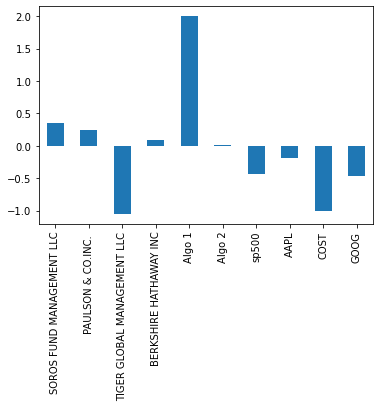

In [218]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
According to the bar the graph ratio, Its shows that the portfolio underperforms. Algo 1 is the only stock out performing the market.